In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette("Set2")

In [2]:
df = pd.read_excel('/Users/hardikchapanera/Downloads/Delivery Data Project.xlsx')

In [3]:
df.head()

,order_id,order_number,created_at,fenix_promised_date,Carrier_Pickup_Date,Actual Days to Ship,actual_delivery_date,processed_at,ship_to_zip,processing_method,...,total_price,total_weight,track_id,carrier,carrier_expected_delivery_date,from_zip_code,quantity,service_code,service_desc,status
0,805537710167,128476,2018-12-28 20:59:18,NaT,2019-01-02 17:15:00,4.844236,2019-01-04 11:17:00,2018-12-28 20:59:18,28144,direct,...,36.90,453,784762388808,FEDEX,2019-02-17 00:58:27,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED
1,805607735383,128477,2018-12-28 23:15:48,2019-01-07,2019-01-02 17:15:00,4.749444,2019-01-04 13:49:00,2018-12-28 23:15:47,76401,express,...,38.00,1587,784762464001,FEDEX,2019-02-17 00:58:25,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED
2,805616844887,128478,2018-12-28 23:41:04,2019-01-07,2019-01-02 22:22:00,4.945093,2019-01-05 12:41:00,2018-12-28 23:41:03,78380,direct,...,42.00,2041,9405511699000085056254,USPS,2019-02-17 00:12:37,98264.0,0,PM,Priority Mail,DELIVERED
3,805680939095,128479,2018-12-29 01:48:56,NaT,2019-01-02 17:15:00,4.643102,2019-01-08 05:28:00,2018-12-29 01:48:56,5256301,direct,...,74.99,907,784762298714,FEDEX,2019-02-17 00:58:24,NaN,1,INTERNATIONAL_ECONOMY,FedEx International Economy,DELIVERED
4,805769412695,128480,2018-12-29 03:34:53,2019-01-09,2019-01-04 17:29:00,6.579248,2019-01-14 10:11:00,2018-12-29 03:34:52,33586,direct,...,157.05,3401,61290985613820000953,FEDEX,2019-02-17 00:58:22,NaN,1,SMART_POST,FedEx SmartPost,DELIVERED


### 3.) What the % orders were split between fenix and non-fenix shipping options?

In [4]:
def percent(x, y):
    
    # This function takes two values and returns their percentage
    percent_x = x / y * 100
    percent_y = 100 - percent_x
    return percent_x, percent_y

In [83]:
df['shipping_source'].value_counts()

shopify                   702
Fennix Commerce           650
Iglobal Shipping Rates     94
fedex                      36
usps                       13
Name: shipping_source, dtype: int64

From the above table we can see that Fenix Commerce was 2nd most used shipping method by customers. 

In [6]:
fennix_percent, others_percent = percent(df['shipping_source'].value_counts()[1], 
                                         sum(df['shipping_source'].value_counts()))

In [7]:
# Creating a dataframe to have shipping source related statistics and information

orders_percent_df = pd.DataFrame({'order_option' : ['Fennix Commerce', 'Others'],
                                 'shipping_percent': [fennix_percent, others_percent]})

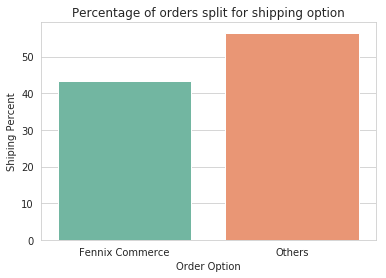

In [8]:
ax = sns.barplot(x="order_option",y="shipping_percent", data = orders_percent_df)
ax.set(xlabel='Order Option', ylabel='Shiping Percent')
ax.set_title("Percentage of orders split for shipping option")
plt.show()

From the above graph we can see that the split for shipping for Fenix commerce is ~43% and non Fenix is ~57%.

In [9]:
(df['shipping_price'] < 0).any()

False

In [77]:
def cost(price):
    if price == 0:
        return 'Free'
    elif price > 0:
        return 'Paid'
    else:
        return 'Other'

In [78]:
df['shipping_cost'] = df['shipping_price'].apply(cost)

In [79]:
df_ship_fenix = df.loc[df['shipping_source'] == 'Fennix Commerce']
df_ship_others = df.loc[df['shipping_source'] != 'Fennix Commerce']

In [80]:
df_ship_fenix['shipping_cost'].value_counts()

Paid    405
Free    245
Name: shipping_cost, dtype: int64

In [81]:
df_ship_others['shipping_cost'].value_counts()

Paid     606
Free     264
Other      4
Name: shipping_cost, dtype: int64

In [120]:
fenix_paid_percent, fenix_free_percent = percent(df_ship_fenix['shipping_cost'].value_counts()[0],
                                                 sum(df_ship_fenix['shipping_cost'].value_counts()))

In [122]:
others_paid_percent, others_free_percent = percent(df_ship_others['shipping_cost'].value_counts()[0],
                                                   (df_ship_others['shipping_cost'].value_counts()[0] + \
                                                    df_ship_others['shipping_cost'].value_counts()[1]))


In [123]:
orders_percent_df['shipping_cost'] = ['Paid', 'Free']
orders_percent_df['fenix_shipping_cost'] = [fenix_paid_percent, fenix_free_percent]
orders_percent_df['others_shipping_cost'] = [others_paid_percent, others_free_percent]

In [124]:
orders_percent_df

,order_option,shipping_percent,shipping_cost,fenix_shipping_cost,others_shipping_cost
0,Fennix Commerce,43.478261,Paid,62.307692,69.655172
1,Others,56.521739,Free,37.692308,30.344828


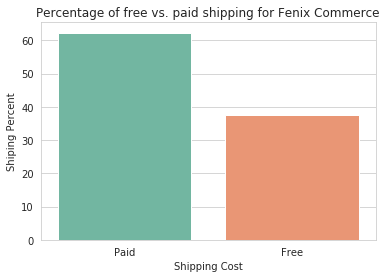

In [125]:
ax = sns.barplot(x="shipping_cost",y="fenix_shipping_cost", data = orders_percent_df)
ax.set(xlabel='Shipping Cost', ylabel='Shiping Percent')
ax.set_title("Percentage of free vs. paid shipping for Fenix Commerce")
plt.show()

From the above graph we can see that, for Fenic Commerce the paid shipping price percent is ~62% and paid shipping price percent is ~38%.

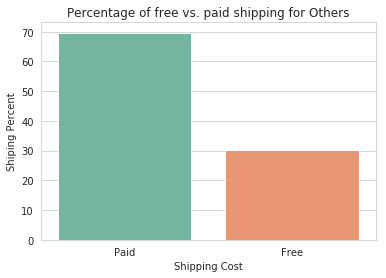

In [126]:
ax = sns.barplot(x="shipping_cost",y="others_shipping_cost", data = orders_percent_df)
ax.set(xlabel='Shipping Cost', ylabel='Shiping Percent')
ax.set_title("Percentage of free vs. paid shipping for Others")
plt.show()

From the above graph we can see that, for Fenic Commerce the paid shipping price percent is ~70% and paid shipping price percent is ~30%.

### Additional Insights

#### Checking the total null values in a dataframe

In [43]:
df.isna().sum()

order_id                             0
order_number                         0
created_at                           0
fenix_promised_date                874
Carrier_Pickup_Date                 56
Actual Days to Ship                  0
actual_delivery_date               105
processed_at                         0
ship_to_zip                          5
processing_method                   25
shipping_source                     29
shipping_title                       4
shipping_code                        4
shipping_price                       4
sub_total_price                      0
total_line_items_price               0
total_discout                        0
total_price                          0
total_weight                         0
track_id                             0
carrier                              0
carrier_expected_delivery_date       0
from_zip_code                     1075
quantity                             0
service_code                         7
service_desc             

Few of the columns have Null Values

In [24]:
df.shape

(1524, 28)

#### Checking if the Order Id has duplicate values

In [25]:
df['order_id'].nunique()

1509

Few of the orders are duplicated

In [41]:
duplicate_order_id = df[df.duplicated(subset=['order_id'],keep=False)].head()
duplicate_order_id.head()

,order_id,order_number,created_at,fenix_promised_date,Carrier_Pickup_Date,Actual Days to Ship,actual_delivery_date,processed_at,ship_to_zip,processing_method,...,total_weight,track_id,carrier,carrier_expected_delivery_date,from_zip_code,quantity,service_code,service_desc,status,shipping_cost
127,810977001559,128609,2019-01-02 14:51:34,2019-01-10,2019-01-03 16:36:00,1.072523,2019-01-09 12:14:09,2019-01-02 14:51:34,29928,direct,...,7484,784783063068,FEDEX,2019-02-17 00:55:54,NaN,1,GROUND_HOME_DELIVERY,FedEx Home Delivery,DELIVERED,Free
128,810977001559,128609,2019-01-02 14:51:34,2019-01-10,2019-01-16 22:44:00,14.328079,2019-01-19 16:41:00,2019-01-02 14:51:34,29928,direct,...,7484,9405511699000699708044,USPS,2019-02-17 00:12:09,98264.0,0,PM,Priority Mail,DELIVERED,Free
258,815745630295,128746,2019-01-06 14:13:40,2019-01-11,2019-01-17 17:05:00,11.118981,2019-01-21 09:40:00,2019-01-06 14:13:39,45174,express,...,3628,785032926903,FEDEX,2019-02-17 00:48:06,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED,Paid
259,815745630295,128746,2019-01-06 14:13:40,2019-01-11,2019-01-09 20:12:00,3.248843,2019-01-11 15:09:00,2019-01-06 14:13:39,45174,express,...,3628,9400111699000070102734,USPS,2019-02-17 00:11:27,98264.0,0,FC,First-Class Package Service,DELIVERED,Paid
264,815940534359,128751,2019-01-06 17:56:25,2019-01-10,2019-01-07 16:41:00,0.947627,2019-01-09 16:02:00,2019-01-06 17:56:25,94928-1504,express,...,2748,784844093445,FEDEX,2019-02-17 00:48:03,NaN,1,FEDEX_2_DAY,FedEx 2Day,DELIVERED,Free


In [33]:
df['order_number'].nunique()

1509

Repeated order_id have same order_number but rest of the values can be different

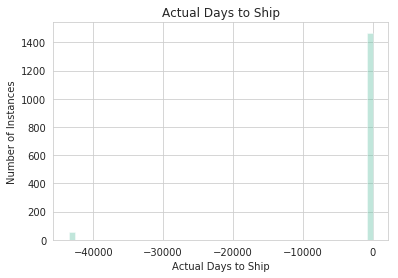

In [70]:
ax = sns.distplot(df['Actual Days to Ship'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Actual Days to Ship', ylabel='Number of Instances')
ax.set_title("Actual Days to Ship")
plt.show()

From the above graph we can that few of the Actual Days to ships are negative

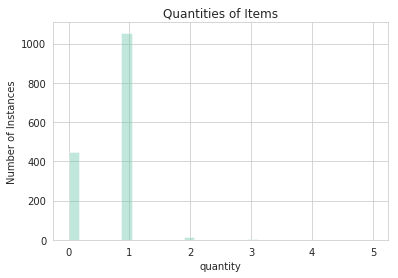

In [72]:
ax = sns.distplot(df['quantity'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='quantity', ylabel='Number of Instances')
ax.set_title("Quantity of Items")
plt.show()

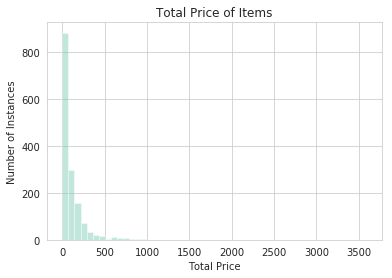

In [92]:
ax = sns.distplot(df['total_price'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Total Price', ylabel='Number of Instances')
ax.set_title("Total Price of Items")
plt.show()

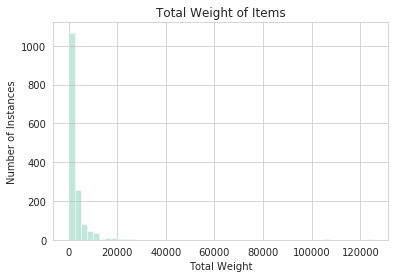

In [108]:
ax = sns.distplot(df['total_weight'], kde = False, norm_hist = False, label = "default")
ax.set(xlabel='Total Weight', ylabel='Number of Instances')
ax.set_title("Total Weight of Items")
plt.show()

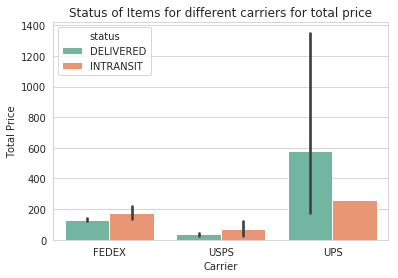

In [105]:
ax = sns.barplot(x="carrier",y="total_price", hue='status', data = df)
ax.set(xlabel='Carrier', ylabel='Total Price')
ax.set_title("Status of Items for different carriers for total price")
plt.show()

UPS had has most priced items in delivered status. Also we can see that for costly items UPS is preferred, then FEDEX and USPS

In [114]:
df['carrier_expected_delivery_date'] = pd.to_datetime(df['carrier_expected_delivery_date'])
df['carrier_expected_delivery_date'].dt.date.unique()

In [117]:
df['carrier_expected_delivery_date'].dt.date.unique()

array([datetime.date(2019, 2, 17)], dtype=object)

The carrier expected delivery data is in the month of February for all orders.